## Import package

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import pearsonr
#. import statsmodels.formula.api as smf

## Loading Data

In [3]:
dic_path = "/Users/peterlin0629/Course/personal practice/Twitch/game_archive"

In [4]:
world_df = pd.read_csv(dic_path + "/Twitch_global_data.csv", thousands=',')

In [5]:
game_df = pd.read_csv(dic_path + "/Twitch_game_data.csv")

## Data Exploration

### Check world_df

In [6]:
world_df.shape

(65, 8)

In [7]:
world_df.dtypes
# Reload data with:  thousands=','

year              int64
Month             int64
Hours_watched     int64
Avg_viewers       int64
Peak_viewers      int64
Streams           int64
Avg_channels      int64
Games_streamed    int64
dtype: object

In [8]:
world_df.isnull().sum()

year              0
Month             0
Hours_watched     0
Avg_viewers       0
Peak_viewers      0
Streams           0
Avg_channels      0
Games_streamed    0
dtype: int64

In [9]:
world_df.head()

,year,Month,Hours_watched,Avg_viewers,Peak_viewers,Streams,Avg_channels,Games_streamed
0,2016,1,480241904,646355,1275257,7701675,20076,12149
1,2016,2,441859897,635769,1308032,7038520,20427,12134
2,2016,3,490669308,660389,1591551,7390957,20271,12234
3,2016,4,377975447,525696,1775120,6869719,16791,12282
4,2016,5,449836631,605432,1438962,7535519,19394,12424


In [10]:
print(
    str(world_df["year"].min()) + "-" + str(world_df[world_df["year"] == world_df["year"].min()]["Month"].min()),
    str(world_df["year"].max()) + "-" + str(world_df[world_df["year"] == world_df["year"].max()]["Month"].max())
)

2016-1 2021-5


In [11]:
world_df["index"] = world_df["year"].astype(str) + "-" + world_df["Month"].astype(str)
world_df["index"] = pd.to_datetime(world_df["index"])

Text(0.5, 1.0, 'Games_streamed trend')

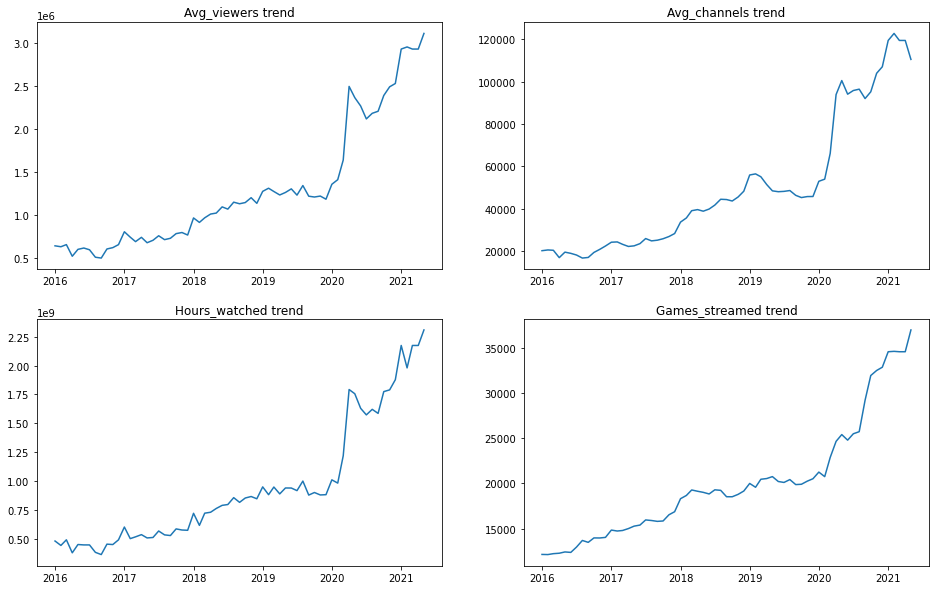

In [12]:
plt.figure(1, figsize=(16,10))

plt.subplot(221)
plt.plot(world_df["index"],world_df["Avg_viewers"])
plt.title("Avg_viewers trend")

plt.subplot(222)
plt.plot(world_df["index"],world_df["Avg_channels"])
plt.title("Avg_channels trend")

plt.subplot(223)
plt.plot(world_df["index"],world_df["Hours_watched"])
plt.title("Hours_watched trend")

plt.subplot(224)
plt.plot(world_df["index"],world_df["Games_streamed"])
plt.title("Games_streamed trend")

#### Fast growth after 2020 (could be due to covid) > Look further to see if there is any predictor

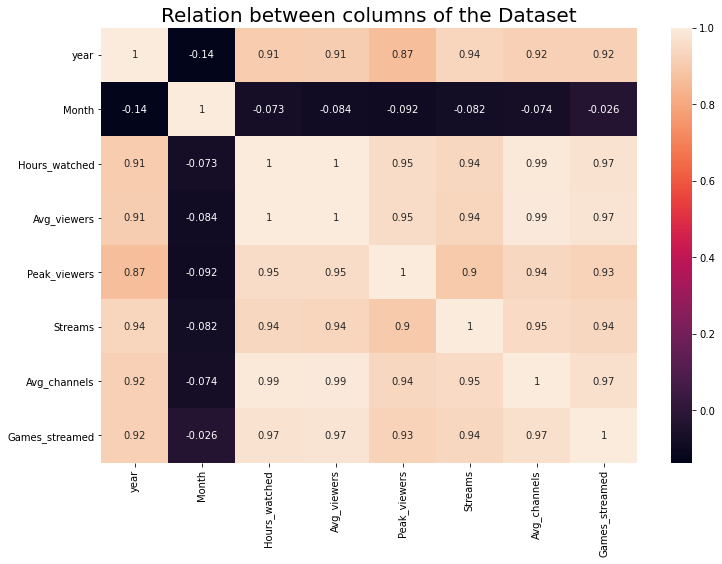

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(world_df.corr(), annot = True) #overall correlation between the various columns present in our data
plt.title('Relation between columns of the Dataset', fontsize = 20)
plt.show()

#### The correlation result is not surprise since many features are generated or deeply correlated to another, for example, the more streams, the more hours of watching, and the higher avg_viewers, the higher possibility having more peak viewers   

### Check game_df 

In [14]:
game_df.dtypes
# Need to deal with "Hours_Streamed"

Rank                  int64
Game                 object
Month                 int64
Year                  int64
Hours_watched         int64
Hours_Streamed       object
Peak_viewers          int64
Peak_channels         int64
Streamers             int64
Avg_viewers           int64
Avg_channels          int64
Avg_viewer_ratio    float64
dtype: object

In [15]:
game_df.isnull().sum()

Rank                0
Game                1
Month               0
Year                0
Hours_watched       0
Hours_Streamed      0
Peak_viewers        0
Peak_channels       0
Streamers           0
Avg_viewers         0
Avg_channels        0
Avg_viewer_ratio    0
dtype: int64

In [16]:
game_df.head()

,Rank,Game,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
0,1,League of Legends,1,2016,94377226,1362044 hours,530270,2903,129172,127021,1833,69.29
1,2,Counter-Strike: Global Offensive,1,2016,47832863,830105 hours,372654,2197,120849,64378,1117,57.62
2,3,Dota 2,1,2016,45185893,433397 hours,315083,1100,44074,60815,583,104.26
3,4,Hearthstone,1,2016,39936159,235903 hours,131357,517,36170,53749,317,169.29
4,5,Call of Duty: Black Ops III,1,2016,16153057,1151578 hours,71639,3620,214054,21740,1549,14.03


In [17]:
# Deal with "Hours_Streamed" column
game_df["Hours_Streamed"] = game_df["Hours_Streamed"].astype(str)
game_df["Hours_Streamed"] = [i.replace("hours", '').strip() for i in game_df["Hours_Streamed"]]
game_df["Hours_Streamed"] = game_df["Hours_Streamed"].astype(int)

In [18]:
game_df["index"] = game_df["Year"].astype(str) + "-" + game_df["Month"].astype(str)
game_df["index"] = pd.to_datetime(game_df["index"])

In [19]:
# Check the rank length 
print(
len(game_df[game_df["index"] == "2016-01-01"]["Rank"].unique()), 
game_df[game_df["index"] == "2016-01-01"]["Rank"].unique()
)
# 150 rank but 51~100 is missing, the rank contains 1~50 and 101~200

150 [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50 101 102 103 104
 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122
 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140
 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158
 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176
 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194
 195 196 197 198 199 200]


In [20]:
print(
len(game_df[game_df["index"] == "2021-01-01"]["Rank"].unique()), 
game_df[game_df["index"] == "2021-01-01"]["Rank"].unique()
)

200 [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200]


In [21]:
for i in game_df["index"].unique():
    if len(game_df[game_df["index"] == i]["Rank"].unique()) != 200:
        print(i, len(game_df[game_df["index"] == i]["Rank"].unique()))
        
# only 2016 Jan is wrong

2016-01-01T00:00:00.000000000 150


In [22]:
#game_df[game_df["index"] == "2016-01-01" & game_df["Rank"] > 50]

game_df.loc[(game_df['index'] == "2016-01-01") & (game_df["Rank"] > 50), 'Rank'] = \
game_df.loc[(game_df['index'] == "2016-01-01") & (game_df["Rank"] > 50), 'Rank'].values - 50 

#### Merge world_df to game_df

In [23]:
game_df = game_df.merge(world_df, on="index", suffixes=('_game', '_global'))

#### The overall game rank by Avg_viewers

In [24]:
game_df.head(2)

,Rank,Game,Month_game,Year,Hours_watched_game,Hours_Streamed,Peak_viewers_game,Peak_channels,Streamers,Avg_viewers_game,...,Avg_viewer_ratio,index,year,Month_global,Hours_watched_global,Avg_viewers_global,Peak_viewers_global,Streams,Avg_channels_global,Games_streamed
0,1,League of Legends,1,2016,94377226,1362044,530270,2903,129172,127021,...,69.29,2016-01-01,2016,1,480241904,646355,1275257,7701675,20076,12149
1,2,Counter-Strike: Global Offensive,1,2016,47832863,830105,372654,2197,120849,64378,...,57.62,2016-01-01,2016,1,480241904,646355,1275257,7701675,20076,12149


In [25]:
game_df_alltime = game_df.groupby("Game").agg({"Avg_viewers_game":"sum"})\
    .sort_values("Avg_viewers_game", ascending = False).rename(columns={"Avg_viewers_game":"total_viewers"})

game_df_alltime["percentage"] = game_df_alltime["total_viewers"]*100 / game_df_alltime["total_viewers"].sum()

In [26]:
game_df_after2020 = game_df[game_df["index"] >= "2020-01-01"]

game_df_after2020 = game_df_after2020.groupby("Game").agg({"Avg_viewers_game":"sum"})\
    .sort_values("Avg_viewers_game", ascending = False).rename(columns={"Avg_viewers_game":"total_viewers"})

game_df_after2020["percentage"] = game_df_after2020["total_viewers"]*100 / game_df_after2020["total_viewers"].sum()

In [27]:
def plotbar(df_x, df_y, df_label):
    graph = plt.bar(df_x, df_y)
    i = 0
    for p in graph:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
      
        plt.text(x+width/2, y+height*1.01,
             str(round(df_label[i],2))+'%',
             ha='center', rotation = 30)
        i += 1

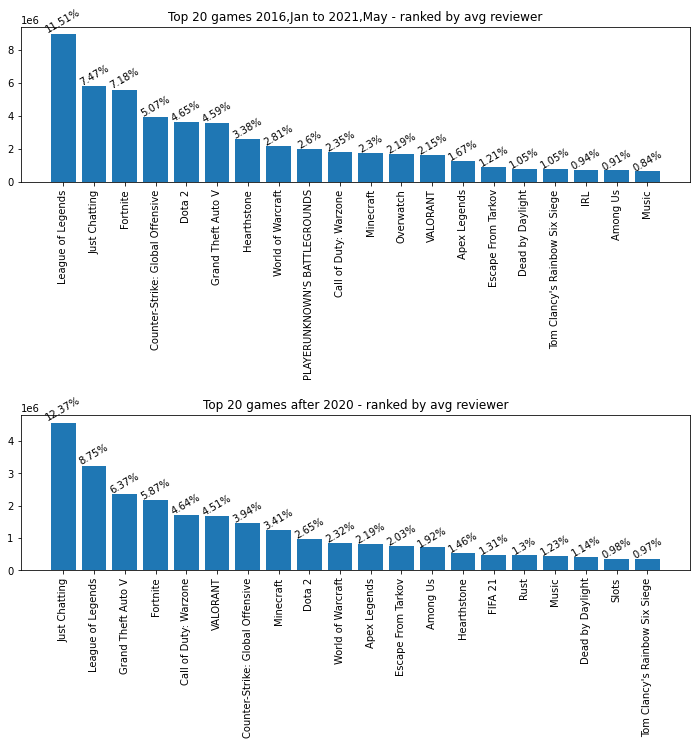

In [148]:
plt.figure(figsize = (12,10))

plt.subplot(211)
plotbar(game_df_alltime.index[:20],  game_df_alltime["total_viewers"][:20], game_df_alltime.percentage)
plt.xticks(rotation = 90)
plt.title("Top 20 games 2016,Jan to 2021,May - ranked by avg reviewer")

plt.subplot(212)
plotbar(game_df_after2020.index[:20],  game_df_after2020["total_viewers"][:20], game_df_after2020.percentage)
plt.xticks(rotation = 90)
plt.title("Top 20 games after 2020 - ranked by avg reviewer")

plt.subplots_adjust(hspace=1.5)

In [28]:
### See what games of all time top 20 are still at top 20 after 2020
game_df_alltime[:20][game_df_alltime.index[:20].isin(game_df_after2020.index[:20])].index.values


array(['League of Legends', 'Just Chatting', 'Fortnite',
       'Counter-Strike: Global Offensive', 'Dota 2', 'Grand Theft Auto V',
       'Hearthstone', 'World of Warcraft', 'Call of Duty: Warzone',
       'Minecraft', 'VALORANT', 'Apex Legends', 'Escape From Tarkov',
       'Dead by Daylight', "Tom Clancy's Rainbow Six Siege", 'Among Us',
       'Music'], dtype=object)

In [29]:
### See what games at top 20 after 2020 are not in top 20 of all time 
game_df_after2020[:20][~game_df_after2020.index[:20].isin(game_df_alltime.index[:20])].index.values


array(['FIFA 21', 'Rust', 'Slots'], dtype=object)

In [30]:
### see more about the growth of ['FIFA 21', 'Rust', 'Slots'] 
rising_game_df = game_df[game_df["Game"].isin(['FIFA 21', 'Rust', 'Slots'])]


In [32]:
FIFA21 = game_df[game_df["Game"] == "FIFA 21"].iloc[:,:13]
Rust = game_df[game_df["Game"] == "Rust"].iloc[:,:13]
Slots = game_df[game_df["Game"] == "Slots"].iloc[:,:13]

In [33]:
rising_game_df = FIFA21.merge(Rust, on="index", how = "outer", suffixes=('_FIFA21', '_Rust'))\
                .merge(Slots, on="index", how = "outer")


In [34]:
rising_game_df = rising_game_df.rename(columns={"Avg_viewers_game":"Avg_viewers_game_Slots",
                                               "Avg_channels_game":"Avg_channels_game_Slots",
                                               "Hours_watched_game":"Hours_watched_game_Slots",
                                                "Games_streamed_game":"Games_streamed_game_Slots"
                                               })
                                                  
rising_game_df = rising_game_df.sort_values("index", ascending = True)

In [35]:
rising_game_df.columns

Index(['Rank_FIFA21', 'Game_FIFA21', 'Month_game_FIFA21', 'Year_FIFA21',
       'Hours_watched_game_FIFA21', 'Hours_Streamed_FIFA21',
       'Peak_viewers_game_FIFA21', 'Peak_channels_FIFA21', 'Streamers_FIFA21',
       'Avg_viewers_game_FIFA21', 'Avg_channels_game_FIFA21',
       'Avg_viewer_ratio_FIFA21', 'index', 'Rank_Rust', 'Game_Rust',
       'Month_game_Rust', 'Year_Rust', 'Hours_watched_game_Rust',
       'Hours_Streamed_Rust', 'Peak_viewers_game_Rust', 'Peak_channels_Rust',
       'Streamers_Rust', 'Avg_viewers_game_Rust', 'Avg_channels_game_Rust',
       'Avg_viewer_ratio_Rust', 'Rank', 'Game', 'Month_game', 'Year',
       'Hours_watched_game_Slots', 'Hours_Streamed', 'Peak_viewers_game',
       'Peak_channels', 'Streamers', 'Avg_viewers_game_Slots',
       'Avg_channels_game_Slots', 'Avg_viewer_ratio'],
      dtype='object')

Text(0.5, 1.0, 'Avg_channels trend rising games')

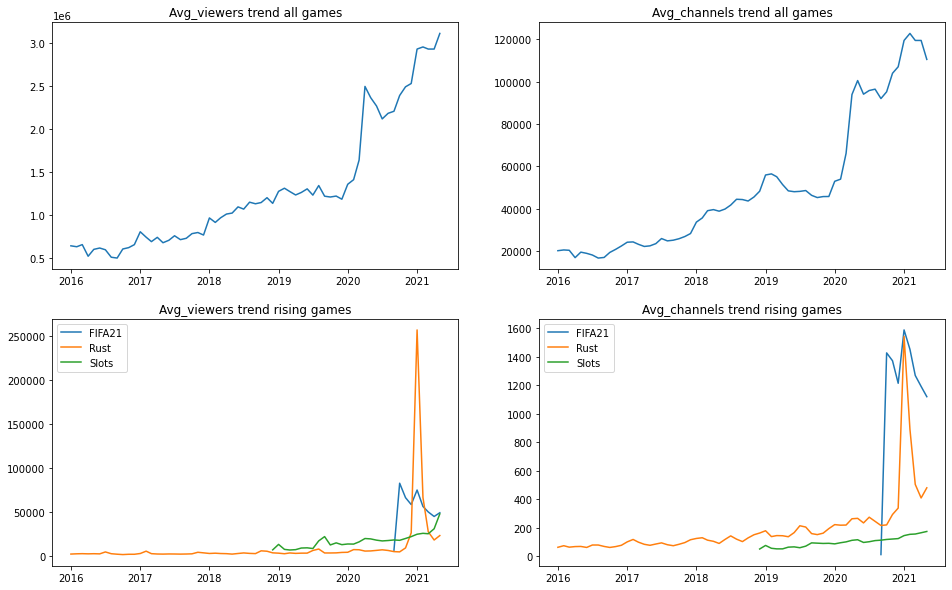

In [36]:
plt.figure(2, figsize=(16,10))

plt.subplot(221)
plt.plot(world_df["index"],world_df["Avg_viewers"])
                            
plt.title("Avg_viewers trend all games")

plt.subplot(222)
plt.plot(world_df["index"],world_df["Avg_channels"])
plt.title("Avg_channels trend all games")

plt.subplot(223)
plt.plot(rising_game_df["index"],rising_game_df["Avg_viewers_game_FIFA21"], label="FIFA21")
plt.plot(rising_game_df["index"],rising_game_df["Avg_viewers_game_Rust"], label="Rust")
plt.plot(rising_game_df["index"],rising_game_df["Avg_viewers_game_Slots"], label="Slots")
plt.title("Avg_viewers trend rising games")
plt.legend()

plt.subplot(224)
plt.plot(rising_game_df["index"],rising_game_df["Avg_channels_game_FIFA21"], label="FIFA21")
plt.plot(rising_game_df["index"],rising_game_df["Avg_channels_game_Rust"], label="Rust")
plt.plot(rising_game_df["index"],rising_game_df["Avg_channels_game_Slots"], label="Slots")
plt.legend()
plt.title("Avg_channels trend rising games")


#### There is a pick of Game "Rust" during 2021 
It actually matchs the recent high volume of news

### What's the most fast growing game recently 

### Does the growth in global avg_viewers have relationship with Covid19?

From anthoer dataset: https://www.kaggle.com/aayushmishra1512/twitchdata ,we know 60% of viewers are English users.       
Thus, we want to use US covid data to see if there is a correlation.


In [37]:
UScovid_df = pd.read_csv(dic_path + "/national-history.csv")

In [38]:
UScovid_df.dtypes

date                         object
death                       float64
deathIncrease                 int64
inIcuCumulative             float64
inIcuCurrently              float64
hospitalizedIncrease          int64
hospitalizedCurrently       float64
hospitalizedCumulative      float64
negative                    float64
negativeIncrease              int64
onVentilatorCumulative      float64
onVentilatorCurrently       float64
positive                    float64
positiveIncrease              int64
states                        int64
totalTestResults              int64
totalTestResultsIncrease      int64
dtype: object

In [39]:
UScovid_df.head(2)

,date,death,deathIncrease,inIcuCumulative,inIcuCurrently,hospitalizedIncrease,hospitalizedCurrently,hospitalizedCumulative,negative,negativeIncrease,onVentilatorCumulative,onVentilatorCurrently,positive,positiveIncrease,states,totalTestResults,totalTestResultsIncrease
0,2021-03-07,515151.0,842,45475.0,8134.0,726,40199.0,776361.0,74582825.0,131835,4281.0,2802.0,28756489.0,41835,56,363825123,1170059
1,2021-03-06,514309.0,1680,45453.0,8409.0,503,41401.0,775635.0,74450990.0,143835,4280.0,2811.0,28714654.0,60015,56,362655064,1430992


In [40]:
UScovid_df["date"] = pd.to_datetime(UScovid_df["date"])

In [41]:
UScovid_df["year_month"] = UScovid_df["date"].dt.to_period('M')

In [42]:
UScovid_agg_df = UScovid_df.groupby("year_month").agg({"positive":"mean","positiveIncrease":"sum"})

In [43]:
world_df.head()

,year,Month,Hours_watched,Avg_viewers,Peak_viewers,Streams,Avg_channels,Games_streamed,index
0,2016,1,480241904,646355,1275257,7701675,20076,12149,2016-01-01
1,2016,2,441859897,635769,1308032,7038520,20427,12134,2016-02-01
2,2016,3,490669308,660389,1591551,7390957,20271,12234,2016-03-01
3,2016,4,377975447,525696,1775120,6869719,16791,12282,2016-04-01
4,2016,5,449836631,605432,1438962,7535519,19394,12424,2016-05-01


In [44]:
world_GC_df = world_df
world_GC_df["index"] = world_GC_df["index"].dt.to_period('M')
world_GC_df = world_GC_df.merge(UScovid_agg_df, left_on="index", right_on="year_month")

In [45]:
world_GC_df["index"] = pd.to_datetime(world_GC_df["index"].astype(str))

In [46]:
world_GC_df.head()

,year,Month,Hours_watched,Avg_viewers,Peak_viewers,Streams,Avg_channels,Games_streamed,index,positive,positiveIncrease
0,2020,1,1010010231,1359367,2400513,15053038,52875,21249,2020-01-01,1.333333e+00,2
1,2020,2,981752149,1412593,2630587,13455714,53882,20748,2020-02-01,6.965517e+00,16
2,2020,3,1218370086,1639798,3402641,17302441,66090,22872,2020-03-01,3.892471e+04,196947
3,2020,4,1792309113,2492780,4455065,17814917,93867,24646,2020-04-01,6.536720e+05,876279
4,2020,5,1755760388,2363069,4043730,20203413,100486,25396,2020-05-01,1.460446e+06,718205


In [47]:
world_GC_df.dtypes

year                         int64
Month                        int64
Hours_watched                int64
Avg_viewers                  int64
Peak_viewers                 int64
Streams                      int64
Avg_channels                 int64
Games_streamed               int64
index               datetime64[ns]
positive                   float64
positiveIncrease             int64
dtype: object

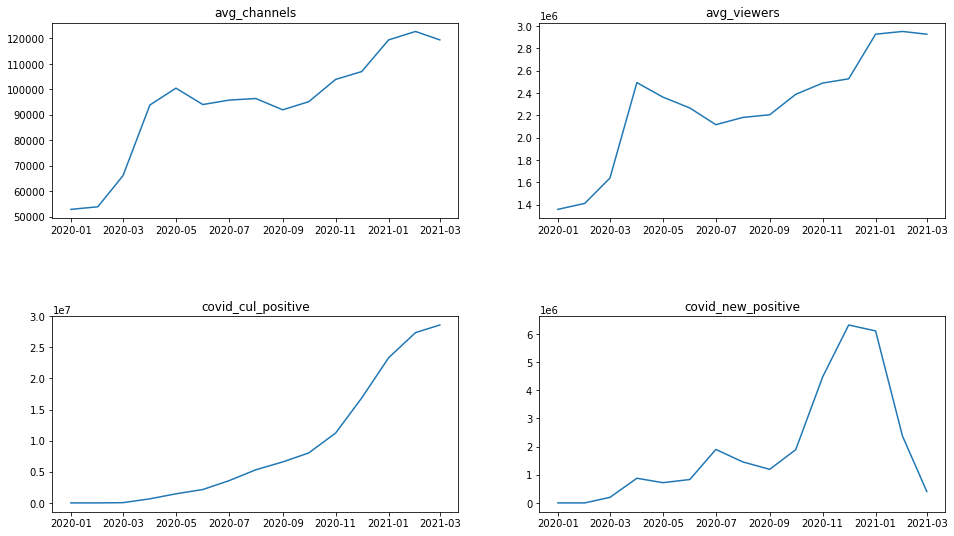

In [48]:
plt.figure(figsize = (16,9))
plt.subplot(221)
plt.plot(world_GC_df["index"], world_GC_df["Avg_channels"])
plt.title("avg_channels")
plt.subplot(222)
plt.plot(world_GC_df["index"], world_GC_df["Avg_viewers"])
plt.title("avg_viewers")
plt.subplot(223)
plt.plot(world_GC_df["index"], world_GC_df["positive"])
plt.title("covid_cul_positive")
plt.subplot(224)
plt.plot(world_GC_df["index"], world_GC_df["positiveIncrease"])
plt.title("covid_new_positive")
plt.subplots_adjust(hspace=0.5)

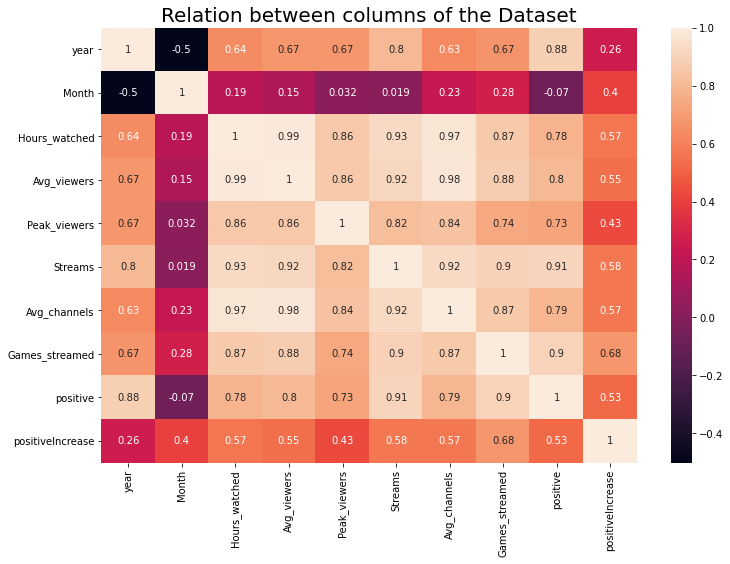

In [49]:
plt.figure(figsize=(12,8))
sns.heatmap(world_GC_df.corr(), annot = True) #overall correlation between the various columns present in our data
plt.title('Relation between columns of the Dataset', fontsize = 20)
plt.show()

#### Use before 2020 world game data to predict after 2020, or use regression discontinuous analysis (RDD)
To be more specific, there is a gap between 2020 Apr and 2020 May

In [51]:
word_RDD_df = world_df

word_RDD_df['after2020'] = 0
word_RDD_df.loc[word_RDD_df['index']>= "2020-05-01",'after2020'] =1 
word_RDD_df['after2020'].value_counts()

0    52
1    13
Name: after2020, dtype: int64

In [57]:
word_RDD_df["index"] = pd.to_datetime(word_RDD_df["index"].astype(str))

In [58]:
word_RDD_df.dtypes

year                       int64
Month                      int64
Hours_watched              int64
Avg_viewers                int64
Peak_viewers               int64
Streams                    int64
Avg_channels               int64
Games_streamed             int64
index             datetime64[ns]
after2020                  int64
Xt                         int64
dtype: object

In [52]:
word_RDD_df.columns

Index(['year', 'Month', 'Hours_watched', 'Avg_viewers', 'Peak_viewers',
       'Streams', 'Avg_channels', 'Games_streamed', 'index', 'after2020'],
      dtype='object')

In [53]:
word_RDD_df["Xt"] = word_RDD_df.index.values + 1

In [54]:
re = ols(formula = "Avg_channels ~ after2020 * Xt ", data = word_RDD_df).fit()
print(re.summary())

                            OLS Regression Results                            
Dep. Variable:           Avg_channels   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     441.1
Date:                Wed, 23 Jun 2021   Prob (F-statistic):           2.73e-41
Time:                        18:17:38   Log-Likelihood:                -664.22
No. Observations:                  65   AIC:                             1336.
Df Residuals:                      61   BIC:                             1345.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      1.11e+04   1926.800      5.762   

Text(0.5, 1.0, 'Regression Discontinuity: Before and After the Cutoff')

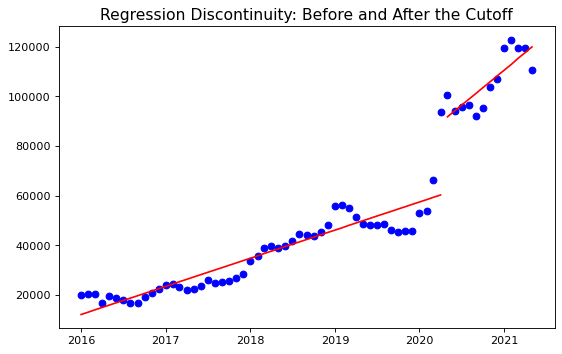

In [59]:
plt.figure(num=None, figsize=(8, 5), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(word_RDD_df['index'],word_RDD_df['Avg_channels'], color="blue")
l=word_RDD_df.loc[word_RDD_df['after2020']==0,'after2020'].count()
plt.plot(word_RDD_df['index'][0:l], re.predict()[0:l], '-', color="r")
plt.plot(word_RDD_df['index'][l:], re.predict()[l:], '-', color="r")
plt.title("Regression Discontinuity: Before and After the Cutoff", fontsize="14")

#### A slope change after 2020, and also a gap between 2020,Apr and 2020,May

### Predictive Model 
Could use attributes of different games to predict the corresponding features of world df to see if there are some games that could be a good prediction of world features  

### Competition/Market Analysis